# Импорты библиотек

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Чтение данных

In [2]:
df_path = "./marketplace.csv"

df = pd.read_csv(df_path)

df.head()

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0
2,user_000002,5,2025-01-19,2025-01-23,browser_02,2025-02-20,0.3,194.612980,485.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaN,0.0,138.780814,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0


# Чистка данных

In [3]:
display(df.describe())
print()
print(df.info())

,platform_num,target,total_buy,total_return
count,25335.000000,25335.000000,25335.000000,25335.000000
mean,6.469982,0.001827,898.549417,334.082448
std,17.016845,0.251240,6815.549317,2882.914996
min,1.000000,-3.428557,0.000000,0.000000
25%,2.000000,0.000000,19.359396,0.000000
50%,3.000000,0.000000,52.715792,0.000000
75%,6.000000,0.000000,203.526684,0.000000
max,674.000000,0.300000,490447.985326,207893.840000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25335 entries, 0 to 25334
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       25335 non-null  object 
 1   platform_num  25335 non-null  int64  
 2   first_login   25335 non-null  object 
 3   reg_dt        25331 non-null  object 
 4   browser       25335 non-null  object 
 5   first_buy     24361 non-null  object 
 6   target        25335 non-null  float64
 7   total_buy     25335 non-null  float64
 8   total_return  25335 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB
None


### Работа с `platform_num`

Основные вопросы:
1. С этим признаком все более-менее понятно - убираем совсем уж странные значения
2. Определиться с интервалами и порогом для разбивки на группы и меткой для совсем странным количеством (например, более 10)

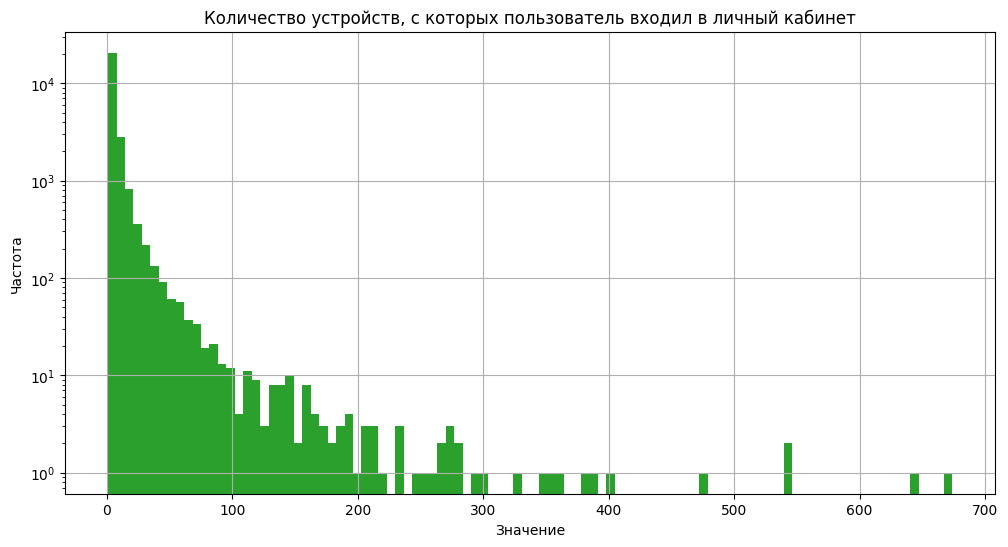

1927     674
14553    647
3067     542
18597    540
17874    475
Name: platform_num, dtype: int64

count    25335.000000
mean         6.469982
std         17.016845
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        674.000000
Name: platform_num, dtype: float64

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["platform_num"].hist(bins=100, log=True)

plt.title("Количество устройств, с которых пользователь входил в личный кабинет")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

display(df["platform_num"].nlargest())
display(df["platform_num"].describe())

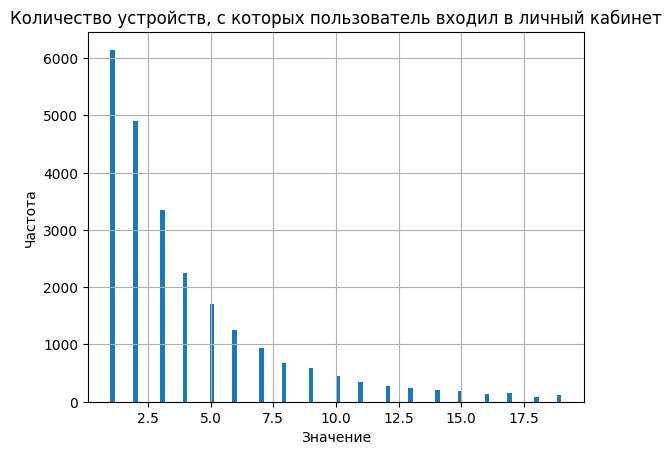

count    24013.000000
mean         4.050015
std          3.650839
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         19.000000
Name: platform_num, dtype: float64

Сопоставление количества аккаунтов до 10 устройств и более: 21823 | 2190


In [5]:
quant = df["platform_num"].quantile(0.95)

platform_by_quantile = df[df["platform_num"] < quant]

platform_by_quantile["platform_num"].hist(bins=100)

plt.title("Количество устройств, с которых пользователь входил в личный кабинет")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

display(platform_by_quantile["platform_num"].describe())

before_target, after_target = (platform_by_quantile["platform_num"] < 10).value_counts().values
print(f"Сопоставление количества аккаунтов до 10 устройств и более: {before_target} | {after_target}")

Краткий итог по `platform_num`:
1. Избавление от 5% самых подозрительных значений приводит к потере `1322` записей (5.22% от общей доли)
2. Максимум: был 674 -> 19, все еще можно делать вывод о подозрительности для более чем 10 устройств на аккаун
3. Разбиение **на группы** и/или добавление **флаг подозрительности** - _следует подумать_ 

### Работа с `total_buy` и `total_return`

Основные вопросы:
1. Что делать с экстримальными значениями - вывести в отдельную категорию или отсечь по 5% ?
2. Возможно, оставить как есть, объяснить, что такие редкие события (платежи) возможны и _сгладить_ данные, например, логарифмированием
3. Пойти от обратного: определиться с гипотезой и, исходя из неё, произвести преобразование, чтобы не стрелять себе в колено

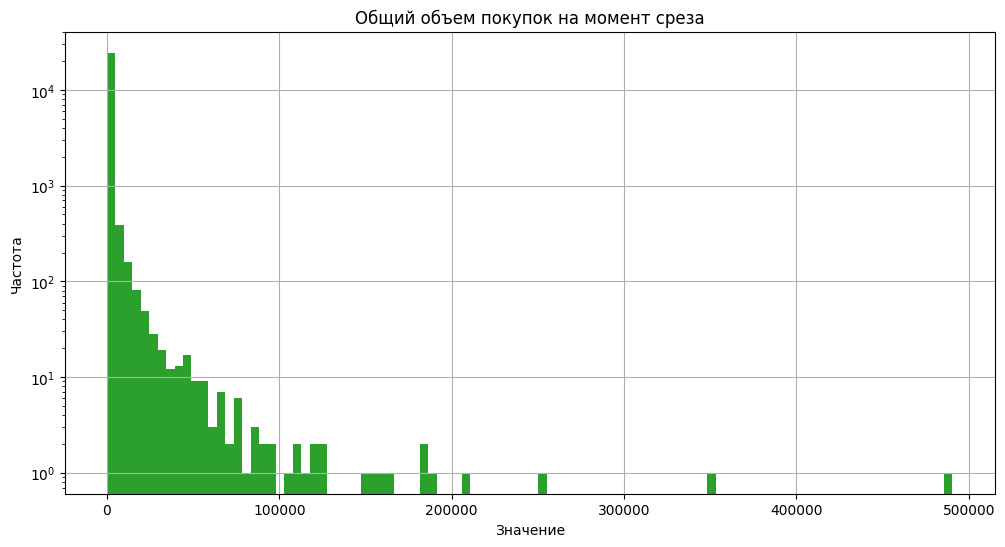

count     25335.000000
mean        898.549417
std        6815.549317
min           0.000000
25%          19.359396
50%          52.715792
75%         203.526684
max      490447.985326
Name: total_buy, dtype: float64

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["total_buy"].hist(bins=100, log=True)

plt.title("Общий объем покупок на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["total_buy"].describe()

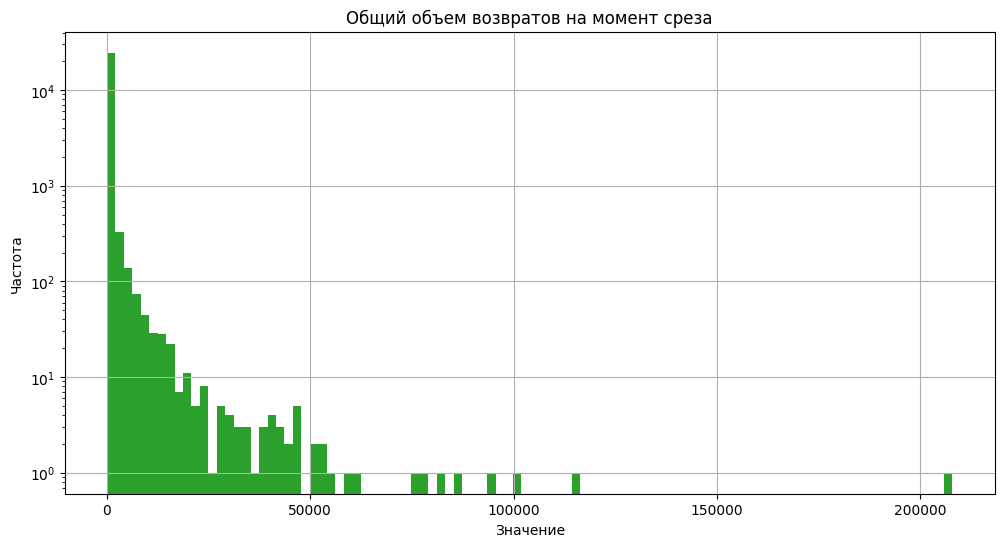

count     25335.000000
mean        334.082448
std        2882.914996
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      207893.840000
Name: total_return, dtype: float64

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["total_return"].hist(bins=100, log=True)

plt.title("Общий объем возвратов на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["total_return"].describe()

In [8]:
# проверка на наличие записей, где сумма покупок меньше суммы возвратов
buys_lt_return = df["total_buy"] < df["total_return"]
print("Сумма покупок меньше суммы возвратов:", buys_lt_return.sum())

Сумма покупок меньше суммы возвратов: 1981


### Работа с датами: `first_login`, `reg_dt` и `first_buy`

Основной вопрос - что делать с `Nan` в `first_buy`:  
1. Есть записи с отсутствием даты, но с суммой покупок
2. Удалить записи, но это очень большой объем данных (~5%)
3. Если присвоить этим полям одну из имеющихся дат (`first_login` или `reg_dt`), то получим искажение для наших гипотез

In [9]:
# преобразование в datetime для удобной работы и вычислений
date_columns = ["reg_dt", "first_buy", "first_login"]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

# статистика дат
print("Статистика 'first_login':")
display(df["first_login"].describe())
print("Статистика 'reg_dt':")
display(df["reg_dt"].describe())
print("Статистика 'first_buy':")
display(df["first_buy"].describe())

Статистика 'first_login':


count                            25335
mean     2025-03-13 22:42:28.348134912
min                2024-09-21 00:00:00
25%                2025-02-07 00:00:00
50%                2025-03-23 00:00:00
75%                2025-04-25 00:00:00
max                2025-07-26 00:00:00
Name: first_login, dtype: object

Статистика 'reg_dt':


count                            25331
mean     2024-12-06 07:49:02.844735744
min                2022-10-11 00:00:00
25%                2024-10-12 00:00:00
50%                2025-02-17 00:00:00
75%                2025-04-18 00:00:00
max                2025-07-26 00:00:00
Name: reg_dt, dtype: object

Статистика 'first_buy':


count                            24361
mean     2025-03-11 13:45:36.094577408
min                2023-08-08 00:00:00
25%                2025-02-10 00:00:00
50%                2025-03-25 00:00:00
75%                2025-05-01 00:00:00
max                2025-07-25 00:00:00
Name: first_buy, dtype: object

In [10]:
buyes_without_first_buy_dt = df[(df["total_buy"].notna()) & (df["first_buy"].isna())]
buyes_without_first_buy_dt.info()

# то есть, ~1к записей не имеют даты первой покупки, но сумма покупок имеется..

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 3 to 25257
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       974 non-null    object        
 1   platform_num  974 non-null    int64         
 2   first_login   974 non-null    datetime64[ns]
 3   reg_dt        970 non-null    datetime64[ns]
 4   browser       974 non-null    object        
 5   first_buy     0 non-null      datetime64[ns]
 6   target        974 non-null    float64       
 7   total_buy     974 non-null    float64       
 8   total_return  974 non-null    float64       
dtypes: datetime64[ns](3), float64(3), int64(1), object(2)
memory usage: 76.1+ KB


In [11]:
diff_with_first_login_date = df["first_login"] - df["reg_dt"]
incorrect_with_reg_date = diff_with_first_login_date.dt.days < 0
print(f"Дата регистрация позже первого логина для #{incorrect_with_reg_date.sum()} записей")

# тоже самое и для интервалов между первой покупкой и первым логином...
diff_with_first_login_date = df["first_buy"] - df["first_login"]
incorrect_with_reg_date = diff_with_first_login_date.dt.days < 0
print("Отрицательных значений разности дат для 'first_login':", incorrect_with_reg_date.sum())

# ...и для даты регистрации
diff_with_reg_date = df["first_buy"] - df["reg_dt"]
incorrect_with_reg_date = diff_with_reg_date.dt.days < 0
print("Отрицательных значений разности дат для 'reg_dt':", incorrect_with_reg_date.sum())

# сказали "понять и простить", без всяких манипуляций или сделать разбиение на группы и присвоением меток 

Дата регистрация позже первого логина для #8597 записей
Отрицательных значений разности дат для 'first_login': 10218
Отрицательных значений разности дат для 'reg_dt': 7543


### Метка `target`

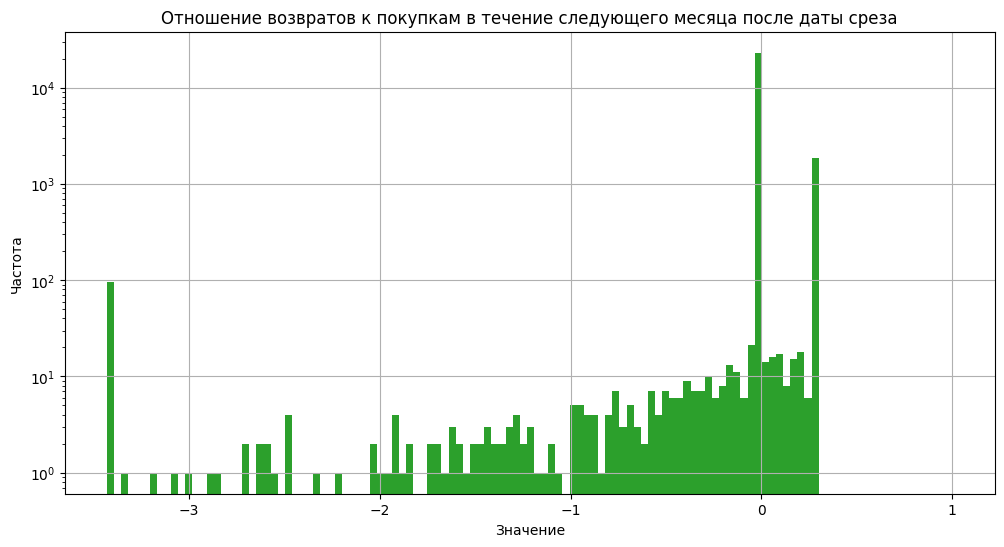

count    25335.000000
mean         0.001827
std          0.251240
min         -3.428557
25%          0.000000
50%          0.000000
75%          0.000000
max          0.300000
Name: target, dtype: float64

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["target"].hist(bins=100, log=True)

plt.title("Отношение возвратов к покупкам в течение следующего месяца после даты среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["target"].describe()

## Создание дополнительных признаков

1. Признаки на основе дат  
- `diff_with_first_login_date` - интервал от первого логина до первой покупки
- `diff_with_reg_date` - интервал от регистрации до первой покупки
- `diff_with_current_date` - интервал от текущей даты до регистрации

* Вопросы
- что делать с отрицательными значениями?
- что делать с Nan?

In [13]:
diff_with_first_login_date = df["first_buy"] - df["first_login"]
diff_with_reg_date = df["first_buy"] - df["reg_dt"]
diff_with_current_date = datetime.today() - df["reg_dt"]

df["diff_with_first_login_date"] = diff_with_first_login_date.dt.days
df["diff_with_reg_date"] = diff_with_reg_date.dt.days
df["diff_with_current_date"] = diff_with_current_date.dt.days

df[["reg_dt", "first_buy", "first_login", "diff_with_first_login_date", "diff_with_reg_date", "diff_with_current_date"]].head()

,reg_dt,first_buy,first_login,diff_with_first_login_date,diff_with_reg_date,diff_with_current_date
0,2024-08-17,2025-03-22,2025-03-22,0.0,217.0,475.0
1,2025-05-15,2025-05-20,2025-05-05,15.0,5.0,204.0
2,2025-01-23,2025-02-20,2025-01-19,32.0,28.0,316.0
3,2023-09-05,NaT,2025-03-15,NaN,NaN,822.0
4,2025-05-14,2025-05-11,2025-05-05,6.0,-3.0,205.0


2. Признаки для группировки
- `platform_num_group` - присвоение группы в зависимости от количества устройств
- `unexpected_platform_num` - присвоение True, если количество больше разумного

In [14]:
# разбиение на группы по количеству используемых устройств
platform_bins = [1, 3, 6, float("inf")]
platform_labels = ["low", "medium", "high"]
df["platform_num_group"] = pd.cut(
    df["platform_num"],
    bins=platform_bins,
    labels=platform_labels,
    right=False,
)

display(df[["platform_num", "platform_num_group"]].head(10))


# добавление метки о подозрительном количестве устройств, например, с 10 и более
trigger = 10
df["unexpected_platform_num"] = df["platform_num"] >= trigger

display(df[["platform_num", "unexpected_platform_num"]].head(10))

,platform_num,platform_num_group
0,12,high
1,1,low
2,5,medium
3,3,medium
4,1,low
5,7,high
6,4,medium
7,6,high
8,3,medium
9,3,medium


,platform_num,unexpected_platform_num
0,12,True
1,1,False
2,5,False
3,3,False
4,1,False
5,7,False
6,4,False
7,6,False
8,3,False
9,3,False


3. Отношение суммы возврата, покупок. Совершались ли возвраты

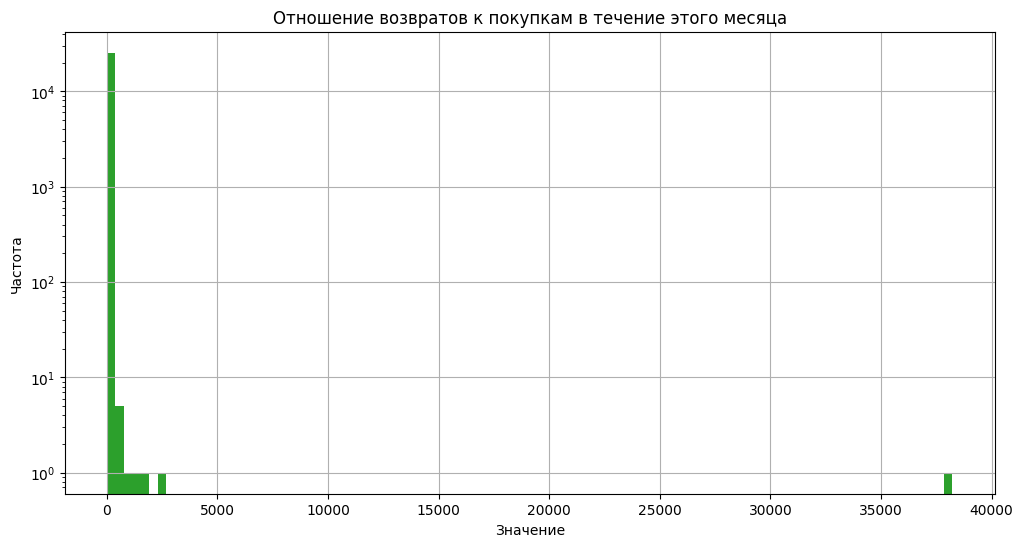

count    25335.000000
mean         2.368689
std        241.402670
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      38227.847855
Name: current_target, dtype: float64

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["current_target"] = np.where(
    df["total_buy"] != 0, 
    (df["total_return"] / df["total_buy"]), 
    0
)

df["current_target"].hist(bins=100, log=True)

plt.title("Отношение возвратов к покупкам в течение этого месяца")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["current_target"].describe()

In [16]:
# метка, покупал ли клиент хоть что-то
df["is_buyer"] = (df["total_buy"] > 0).astype(int)

# если покупал, то считаем отношение, если нет - 0
df["buyer_return_rate"] = np.where(
    df["is_buyer"] == 1,
    df["total_return"] / df["total_buy"],
    0,
)

df["buyer_return_rate"].nlargest()

21251    38227.847855
24523     2555.064999
384       1853.473317
18582     1340.544206
4027       891.108691
Name: buyer_return_rate, dtype: float64

In [17]:
df.head()

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return,diff_with_first_login_date,diff_with_reg_date,diff_with_current_date,platform_num_group,unexpected_platform_num,current_target,is_buyer,buyer_return_rate
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0,0.0,217.0,475.0,high,True,0.000000,1,0.000000
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0,15.0,5.0,204.0,low,False,0.000000,1,0.000000
2,user_000002,5,2025-01-19,2025-01-23,browser_02,2025-02-20,0.3,194.612980,485.0,32.0,28.0,316.0,medium,False,2.492126,1,2.492126
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaT,0.0,138.780814,0.0,NaN,NaN,822.0,medium,False,0.000000,1,0.000000
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0,6.0,-3.0,205.0,low,False,0.000000,1,0.000000


# Гипотезы

### Гипотеза №1.

Пользователи с высокой долей возвратов в прошлом, будут иметь высокий показатель возвратов (`target`) в будущем. Проверка связи `current_target`, `total_return` с `target`. 

<ЗДЕСЬ ПРЕДПОЛАГАЕМЫЙ СТАТИСТИЧЕСКИЙ МЕТОД>

### Гипотеза №2.

Изначальная низкая вовлеченность пользователя как анализ связи между <ПЕРВАЯ ПОКУПКА> и <ПЕРВЫЙ ЛОГИН | РЕГИСТРАИЯ> -> чем больше интервал, тем ниже заинтересованность, что увеличивает вероятность возврата.

Сравнение по группам вида "_до 7 дней_" | "_после_" --> есть ли статистически значимые различия <СРЕДНЕГО> `target` между этими группами.

<ЗДЕСЬ ПРЕДПОЛАГАЕМЫЙ СТАТИСТИЧЕСКИЙ МЕТОД>

### Гипотеза №3.

Большое <КАКОЕ?> количество платформ ведет к более высокому показателю возвратов.

Группировка по количеству платформ <ОПРЕДЕЛИТЬ ИНТЕРВАЛЫ> --> есть ли статистически значимые различия <СРЕДНЕГО> `target` между этими группами.

<ЗДЕСЬ ПРЕДПОЛАГАЕМЫЙ СТАТИСТИЧЕСКИЙ МЕТОД>

### Гипотеза №4.

Пользователи определенной группы браузеров имеют больший показатель возвратов, чем другие.

Группировка по браузерам в разрезе количества пользователей --> есть ли статистически значимые различия <СРЕДНЕГО> `target` между этими группами.

<ЗДЕСЬ ПРЕДПОЛАГАЕМЫЙ СТАТИСТИЧЕСКИЙ МЕТОД>